# Portfolio Exercise 2 - Multi-claasss classification: Transformer Models





Financial sentiment analysis is essential for understanding market trends and guiding investment decisions. This assignment focuses on fine-tuning a transformer model to classify financial text using the Financial PhraseBank dataset.

**Multi-Class Classification** – Categorizing financial statements into one of three sentiment classes:  
  - **Positive** – Indicates a favorable financial outlook.  
  - **Negative** – Suggests financial risks or downturns.  
  - **Neutral** – Neither explicitly positive nor negative.

Using FinBERT, we will train and evaluate models to enhance sentiment detection in financial news and reports. This project provides practical experience in deep learning and NLP for real-world financial applications.

## **1. Dataset Selection and Preprocessing**
- Choose a dataset appropriate for your chosen classification task (**binary, multi-class, or multi-label**).
- Preprocess the data as needed (**tokenization, handling class imbalance, etc.**).


### 1.1  Install and Import Dependencies

In [ ]:
!pip install transformers datasets torch scikit-learn accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split

### 1.2 Load and Preprocess the Dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2264 non-null   object
 1   label     2264 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.5+ KB
None
label
1    1391
2     570
0     303
Name: count, dtype: int64


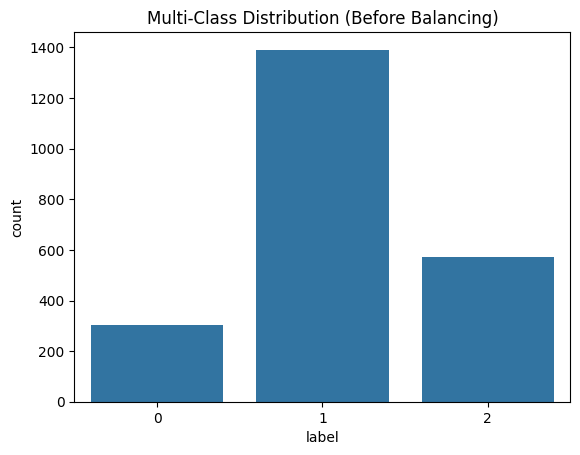

In [ ]:
# Load Financial PhraseBank dataset
dataset = load_dataset("financial_phrasebank", "sentences_allagree")
df = pd.DataFrame(dataset["train"])

# Check for missing values and class distribution
print(df.info())
print(df["label"].value_counts())

# Plot original class distribution
sns.countplot(x=df["label"])
plt.title("Multi-Class Distribution (Before Balancing)")
plt.show()

### 1.3 Balancing the data

In [ ]:
# # Balance dataset using oversampling
# df_majority = df[df["label"] == 1]  # Neutral (majority)
# df_minority_0 = df[df["label"] == 0]  # Negative
# df_minority_2 = df[df["label"] == 2]  # Positive

# df_minority_0_upsampled = resample(df_minority_0, replace=True, n_samples=len(df_majority), random_state=42)
# df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=len(df_majority), random_state=42)

# df_balanced = pd.concat([df_majority, df_minority_0_upsampled, df_minority_2_upsampled]).sample(frac=1, random_state=42)

# # Plot new balanced class distribution
# sns.countplot(x=df_balanced["label"])
# plt.title("Balanced Multi-Class Distribution")
# plt.show()

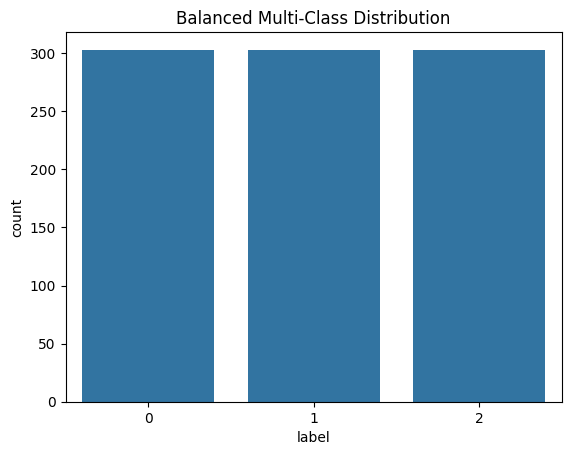

In [ ]:
# Balance dataset using undersampling
# Separate classes
df_majority = df[df["label"] == 1]  # Majority class (neutral)
df_minority_0 = df[df["label"] == 0]  # Negative class
df_minority_2 = df[df["label"] == 2]  # Positive class

# Oversample minority classes to match majority
df_minority_0_upsampled = resample(df_majority, replace=True, n_samples=len(df_minority_0), random_state=42)
df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=len(df_minority_0), random_state=42)

# Combine all classes
df_balanced = pd.concat([df_minority_0, df_minority_0_upsampled, df_minority_2_upsampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Plot new balanced class distribution
sns.countplot(x=df_balanced["label"])
plt.title("Balanced Multi-Class Distribution")
plt.show()

### 1.4 Train-test split and Cross-Validation and Training Function

In [ ]:
# Split dataset into Train (80%) & Test (20%) BEFORE K-Fold CV
df_train, df_test = train_test_split(df_balanced, test_size=0.2, random_state=42)

# Convert test set to Hugging Face Dataset
test_dataset = Dataset.from_dict({"sentence": df_test["sentence"].tolist(), "label": df_test["label"].tolist()})

In [ ]:
# Stratified K-Fold (5-Fold Cross Validation)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Convert dataframe to lists
sentences = df_train["sentence"].tolist()
labels = df_train["label"].tolist()

## **2. Model Selection and Fine-Tuning**
- Use a **transformer model** (e.g., **BERT, RoBERTa, DistilBERT**) from Hugging Face.
- Fine-tune the model on your selected dataset using libraries such as **Simple Transformers** or **Hugging Face Transformers**.
- Document your training process, including:
  - Hyperparameter choices  
  - Evaluation metrics  
  - Challenges encountered  



### 2.1 Load Tokenizer and Tokenize Data

In [ ]:
# Load FinBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

# Define tokenization function
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### 2.2 Train the Model

In [ ]:
# Define evaluation metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Convert logits to predicted class labels
    predictions = np.argmax(predictions, axis=1)

    # Compute classification metrics
    precision_w, recall_w, f1_w, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    precision_m, recall_m, f1_m, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    acc = accuracy_score(labels, predictions)

    return {
        "accuracy": acc,
        "f1_weighted": f1_w,
        "precision_weighted": precision_w,
        "recall_weighted": recall_w,
        "f1_macro": f1_m,
        "precision_macro": precision_m,
        "recall_macro": recall_m,
    }

In [ ]:
cv_results = []  # Store results from each fold

for fold, (train_idx, val_idx) in enumerate(skf.split(sentences, labels)):
    print(f"\n🔹 **Fold {fold + 1} / {skf.get_n_splits()}**")

    # Prepare Train & Validation Sets
    train_texts = [sentences[i] for i in train_idx]
    val_texts = [sentences[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    train_dataset = Dataset.from_dict({"sentence": train_texts, "label": train_labels}).map(tokenize_function, batched=True)
    val_dataset = Dataset.from_dict({"sentence": val_texts, "label": val_labels}).map(tokenize_function, batched=True)

    # Load FinBERT model
    model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=3)

    # Define Training Arguments
    training_args = TrainingArguments(
        output_dir=f"./finbert-multiclass-fold-{fold + 1}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f"./logs-fold-{fold + 1}",
        logging_steps=10,
        report_to="none"
    )

    # Define Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    print(f"  🚀 Training Fold {fold + 1}...")
    trainer.train()

    # Evaluate Model
    results = trainer.evaluate()
    print(f"  📊 Evaluation Metrics (Fold {fold + 1}):", results)
    cv_results.append(results)

    # Save trained model
    model.save_pretrained(f"./finbert-multiclass-fold-{fold + 1}")
    tokenizer.save_pretrained(f"./finbert-multiclass-fold-{fold + 1}")


🔹 **Fold 1 / 5**


Map:   0%|          | 0/581 [00:00<?, ? examples/s]

Map:   0%|          | 0/146 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  🚀 Training Fold 1...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Precision Weighted,Recall Weighted,F1 Macro,Precision Macro,Recall Macro
1,0.410500,0.421378,0.821918,0.816875,0.845139,0.821918,0.816953,0.844859,0.822137
2,0.113400,0.168203,0.924658,0.924922,0.926954,0.924658,0.924989,0.927296,0.924461
3,0.028800,0.158892,0.945205,0.945260,0.945703,0.945205,0.945274,0.945783,0.945153


  📊 Evaluation Metrics (Fold 1): {'eval_loss': 0.1588924378156662, 'eval_accuracy': 0.9452054794520548, 'eval_f1_weighted': 0.9452596644839043, 'eval_precision_weighted': 0.9457030334722056, 'eval_recall_weighted': 0.9452054794520548, 'eval_f1_macro': 0.9452740097666847, 'eval_precision_macro': 0.9457829230983174, 'eval_recall_macro': 0.9451530612244898, 'eval_runtime': 1.048, 'eval_samples_per_second': 139.314, 'eval_steps_per_second': 18.13, 'epoch': 3.0}

🔹 **Fold 2 / 5**


Map:   0%|          | 0/581 [00:00<?, ? examples/s]

Map:   0%|          | 0/146 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  🚀 Training Fold 2...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Precision Weighted,Recall Weighted,F1 Macro,Precision Macro,Recall Macro
1,0.713000,0.588567,0.767123,0.759430,0.799315,0.767123,0.759412,0.798413,0.767857
2,0.297500,0.180065,0.958904,0.959015,0.960044,0.958904,0.959005,0.960168,0.958759
3,0.103100,0.147768,0.952055,0.952098,0.953052,0.952055,0.952066,0.953082,0.951956


  📊 Evaluation Metrics (Fold 2): {'eval_loss': 0.14776846766471863, 'eval_accuracy': 0.952054794520548, 'eval_f1_weighted': 0.9520977737643989, 'eval_precision_weighted': 0.9530524852588391, 'eval_recall_weighted': 0.952054794520548, 'eval_f1_macro': 0.9520656012969718, 'eval_precision_macro': 0.9530823786142935, 'eval_recall_macro': 0.9519557823129251, 'eval_runtime': 1.0532, 'eval_samples_per_second': 138.626, 'eval_steps_per_second': 18.04, 'epoch': 3.0}

🔹 **Fold 3 / 5**


Map:   0%|          | 0/582 [00:00<?, ? examples/s]

Map:   0%|          | 0/145 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  🚀 Training Fold 3...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Precision Weighted,Recall Weighted,F1 Macro,Precision Macro,Recall Macro
1,0.362600,0.358093,0.882759,0.881258,0.881423,0.882759,0.881615,0.881526,0.883362
2,0.154300,0.185859,0.917241,0.917848,0.919675,0.917241,0.918128,0.919968,0.917517
3,0.026900,0.152063,0.924138,0.924541,0.925854,0.924138,0.924804,0.926062,0.924461


  📊 Evaluation Metrics (Fold 3): {'eval_loss': 0.1520627737045288, 'eval_accuracy': 0.9241379310344827, 'eval_f1_weighted': 0.9245405931702835, 'eval_precision_weighted': 0.9258536173089925, 'eval_recall_weighted': 0.9241379310344827, 'eval_f1_macro': 0.924804083830186, 'eval_precision_macro': 0.926062091503268, 'eval_recall_macro': 0.9244614512471655, 'eval_runtime': 1.0741, 'eval_samples_per_second': 134.994, 'eval_steps_per_second': 17.689, 'epoch': 3.0}

🔹 **Fold 4 / 5**


Map:   0%|          | 0/582 [00:00<?, ? examples/s]

Map:   0%|          | 0/145 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  🚀 Training Fold 4...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Precision Weighted,Recall Weighted,F1 Macro,Precision Macro,Recall Macro
1,0.611700,0.396940,0.827586,0.822870,0.851359,0.827586,0.823612,0.850978,0.829223
2,0.127100,0.188568,0.944828,0.944792,0.946950,0.944828,0.944704,0.946581,0.945011
3,0.058600,0.167543,0.951724,0.951700,0.953504,0.951724,0.951660,0.953181,0.951956


  📊 Evaluation Metrics (Fold 4): {'eval_loss': 0.1675427109003067, 'eval_accuracy': 0.9517241379310345, 'eval_f1_weighted': 0.9516995216324319, 'eval_precision_weighted': 0.9535041602848036, 'eval_recall_weighted': 0.9517241379310345, 'eval_f1_macro': 0.9516596099179999, 'eval_precision_macro': 0.9531812725090036, 'eval_recall_macro': 0.9519557823129251, 'eval_runtime': 1.0656, 'eval_samples_per_second': 136.076, 'eval_steps_per_second': 17.831, 'epoch': 3.0}

🔹 **Fold 5 / 5**


Map:   0%|          | 0/582 [00:00<?, ? examples/s]

Map:   0%|          | 0/145 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  🚀 Training Fold 5...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Precision Weighted,Recall Weighted,F1 Macro,Precision Macro,Recall Macro
1,0.421100,0.357632,0.903448,0.903078,0.907240,0.903448,0.903063,0.907049,0.903628
2,0.103900,0.207037,0.917241,0.917451,0.920879,0.917241,0.917549,0.920645,0.917659
3,0.131000,0.163320,0.937931,0.937931,0.938066,0.937931,0.937858,0.937925,0.937925


  📊 Evaluation Metrics (Fold 5): {'eval_loss': 0.16331952810287476, 'eval_accuracy': 0.9379310344827586, 'eval_f1_weighted': 0.9379310344827586, 'eval_precision_weighted': 0.9380659160215811, 'eval_recall_weighted': 0.9379310344827586, 'eval_f1_macro': 0.9378579610538372, 'eval_precision_macro': 0.9379251700680272, 'eval_recall_macro': 0.9379251700680272, 'eval_runtime': 1.0352, 'eval_samples_per_second': 140.071, 'eval_steps_per_second': 18.354, 'epoch': 3.0}


## **3. Evaluation**
- Evaluate your fine-tuned model using appropriate metrics:
  - **Binary Classification**: Accuracy, F1-score, ROC-AUC  
  - **Multi-Class / Multi-Label**: Precision, Recall, F1-score  
- Provide a **brief analysis** of the model’s performance on the test set.



### 3.1 Evaluate Model Performance

In [ ]:
# Extract metrics from each fold
accuracy_scores = np.array([res["eval_accuracy"] for res in cv_results])
f1_weighted_scores = np.array([res["eval_f1_weighted"] for res in cv_results])
precision_weighted_scores = np.array([res["eval_precision_weighted"] for res in cv_results])
recall_weighted_scores = np.array([res["eval_recall_weighted"] for res in cv_results])
loss_scores = np.array([res["eval_loss"] for res in cv_results])

# Compute mean and standard deviation
evaluation_summary = {
    "Mean Accuracy": (accuracy_scores.mean(), accuracy_scores.std()),
    "Mean F1 (Weighted)": (f1_weighted_scores.mean(), f1_weighted_scores.std()),
    "Mean Precision (Weighted)": (precision_weighted_scores.mean(), precision_weighted_scores.std()),
    "Mean Recall (Weighted)": (recall_weighted_scores.mean(), recall_weighted_scores.std()),
    "Mean Validation Loss": (loss_scores.mean(), loss_scores.std()),
}

# Find best fold based on highest accuracy
best_fold = np.argmax(accuracy_scores) + 1
best_accuracy = accuracy_scores[best_fold - 1]

# Print summary
print("\n🔍 **Cross-Validation Summary (5-Fold)**")
for metric, (mean, std) in evaluation_summary.items():
    print(f"  📌 {metric}: {mean:.4f} ± {std:.4f}")

# Print best fold
print(f"\n🏆 **Best Performing Fold: Fold {best_fold} with Accuracy {best_accuracy:.4f}**")



🔍 **Cross-Validation Summary (5-Fold)**
  📌 Mean Accuracy: 0.9422 ± 0.0104
  📌 Mean F1 (Weighted): 0.9423 ± 0.0103
  📌 Mean Precision (Weighted): 0.9432 ± 0.0104
  📌 Mean Recall (Weighted): 0.9422 ± 0.0104
  📌 Mean Validation Loss: 0.1579 ± 0.0072

🏆 **Best Performing Fold: Fold 2 with Accuracy 0.9521**


### 3.2 Evaluate the Best Model on Test Set

In [ ]:
# Load best model (highest accuracy fold)
best_fold = np.argmax([res["eval_accuracy"] for res in cv_results]) + 1
best_model_path = f"./finbert-multiclass-fold-{best_fold}"

# Load model & tokenizer
model = AutoModelForSequenceClassification.from_pretrained(best_model_path)
tokenizer = AutoTokenizer.from_pretrained(best_model_path)

# Tokenize test dataset
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Evaluate on the test set
test_results = trainer.evaluate(test_dataset)

print("\n📊 **Final Test Set Performance**")
print(f"  ✅ Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"  ✅ F1-Score (Weighted): {test_results['eval_f1_weighted']:.4f}")
print(f"  ✅ Precision: {test_results['eval_precision_weighted']:.4f}")
print(f"  ✅ Recall: {test_results['eval_recall_weighted']:.4f}")

Map:   0%|          | 0/182 [00:00<?, ? examples/s]


📊 **Final Test Set Performance**
  ✅ Accuracy: 0.9615
  ✅ F1-Score (Weighted): 0.9614
  ✅ Precision: 0.9616
  ✅ Recall: 0.9615


### 3.3 Confusion metrix

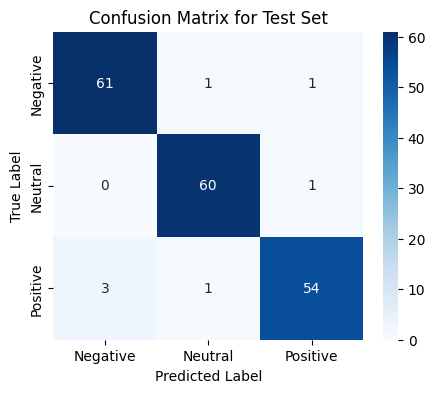

In [ ]:
# Get model predictions on test set
y_pred = trainer.predict(test_dataset).predictions.argmax(axis=1)
y_true = df_test["label"].tolist()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()

## **4. Test on different dataset**
- We try teesting on another dataset that looks like the original dataset.

## 4.1 Loading the dataset

In [ ]:
# **Updated GitHub raw file URL (the raw link)**
github_url = "https://raw.githubusercontent.com/FrannerenxD/Applied_Deep_Learning_and_Artificial_Intelligence/ba937039684d2e9cfc4b4e13ea07d417a265ddee/Generated_Sentiment_Dataset.csv"

# Load dataset into pandas
df_new_data = pd.read_csv(github_url)

# Show the first 5 rows
print(df_new_data.head())

  Sentiment                                           Sentence
0   neutral  Market trends suggest stability in the coming ...
1  negative  The company faced significant losses due to de...
2  positive  Employee satisfaction levels have reached an a...
3  positive  The company expanded its operations to new int...
4  positive  The company expanded its operations to new int...


## 4.2 Data preprocessing

In [ ]:
# Convert Sentiment labels to numerical values
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df_new_data["label"] = df_new_data["Sentiment"].map(sentiment_mapping)

# Rename "Sentence" column to "sentence" for compatibility
df_new_data = df_new_data.rename(columns={"Sentence": "sentence"})

# Drop any rows with missing values (if any)
df_new_data = df_new_data.dropna()

# Drop Sentiment column
df_new_data = df_new_data.drop(columns=["Sentiment"])

# Print first few rows to verify
print(df_new_data.head())

                                            sentence  label
0  Market trends suggest stability in the coming ...      1
1  The company faced significant losses due to de...      0
2  Employee satisfaction levels have reached an a...      2
3  The company expanded its operations to new int...      2
4  The company expanded its operations to new int...      2


In [ ]:
# Convert Pandas DataFrame to Hugging Face Dataset
test_dataset = Dataset.from_pandas(df_new_data)

print(test_dataset)

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4845
})


In [ ]:
# Tokenize the GitHub dataset
test_dataset = test_dataset.map(lambda x: tokenizer(x["sentence"], padding="max_length", truncation=True, max_length=128), batched=True)

print(test_dataset)

Map:   0%|          | 0/4845 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4845
})


In [ ]:
# Define Trainer for evaluation, including compute_metrics
trainer = Trainer(model=model, compute_metrics=compute_metrics)

# Evaluate on the new dataset
test_results = trainer.evaluate(test_dataset)

# Print test performance results
print("\n📊 **GitHub Dataset Performance (Tested with Fold 2 Model)**")
print(f"  ✅ Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"  ✅ F1-Score (Weighted): {test_results['eval_f1_weighted']:.4f}")
print(f"  ✅ Precision: {test_results['eval_precision_weighted']:.4f}")
print(f"  ✅ Recall: {test_results['eval_recall_weighted']:.4f}")

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).



📊 **GitHub Dataset Performance (Tested with Fold 2 Model)**
  ✅ Accuracy: 0.6442
  ✅ F1-Score (Weighted): 0.6434
  ✅ Precision: 0.7052
  ✅ Recall: 0.6442


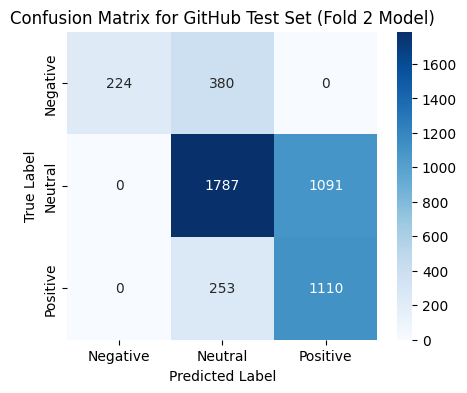

In [ ]:
# Get model predictions
y_pred = trainer.predict(test_dataset).predictions.argmax(axis=1)
y_true = test_dataset["label"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for GitHub Test Set (Fold 2 Model)")
plt.show()

## **5. Deployment (Optional)**
- Optionally, develop a **simple web application** using **Streamlit** or **Gradio**.
- The app should allow users to **input text and see classification predictions**.
- This step demonstrates how your model can be used in a **real-world application**.



ERROR:pyngrok.process.ngrok:t=2025-02-16T16:54:58+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-16T16:54:58+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-16T16:54:58+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

## **6. Upload to Hugging Face Hub**
- Once fine-tuning is complete, upload your model to the **Hugging Face Hub**.
- Provide a **repository link** and ensure your **model card** includes:
  - Dataset details  
  - Training parameters  
  - Evaluation metrics  
  - Intended use  

In [ ]:
!pip install huggingface_hub

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import HfApi

## 6.1 Saving the model loccaly

In [ ]:
# Define a save path for the model
save_directory = "./finbert-finetuned-github"

# Save model and tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print("✅ Model and tokenizer saved locally!")

✅ Model and tokenizer saved locally!


## 6.2 Creating a Hugginface repository

In [ ]:
# Define your Hugging Face model repo name (choose a unique name)
repo_name = "Driisa/finbert-finetuned-github"

# Create a model repo on Hugging Face
api = HfApi()
api.create_repo(repo_id=repo_name, repo_type="model")

print(f"✅ Repository created: https://huggingface.co/{Assignment_2}")

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-67b20307-397ea06552f340f837cc1b06;698c36ea-5886-4980-9e7d-70eb28210cf9)

Invalid username or password.

## 6.3 Uploading the model to the repository

In [ ]:
# Upload the local model folder to Hugging Face
api.upload_folder(
    folder_path=save_directory,
    repo_id=repo_name,
    repo_type="model"
)

print(f"✅ Model uploaded successfully! View it here: https://huggingface.co/{Assignment_2}")

RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-67b20312-1a72bed85326ac314e6e1c8a;a684b53f-1591-4fda-b849-d2b97ab20778)

Repository Not Found for url: https://huggingface.co/api/models/Driisa/finbert-finetuned-github/preupload/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password.
Note: Creating a commit assumes that the repo already exists on the Huggingface Hub. Please use `create_repo` if it's not the case.

## 6.4 Test if the model is available

In [ ]:
# Load from Hugging Face Hub
model = AutoModelForSequenceClassification.from_pretrained("Driisa/finbert-finetuned-github")
tokenizer = AutoTokenizer.from_pretrained("Driisa/finbert-finetuned-github")

print("✅ Model loaded successfully from Hugging Face Hub!")

config.json:   0%|          | 0.00/895 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

✅ Model loaded successfully from Hugging Face Hub!


The repository can be acces on this link: https://huggingface.co/Driisa/finbert-finetuned-github/resolve/main/README.md